In [1]:
import pandas as pd
import matplotlib.pyplot as plt

eca_results = pd.read_csv('yolov8_ECA_results.csv')
gam_results = pd.read_csv('yolov8_GAM_results.csv')
resblock_cbam_results = pd.read_csv('yolov8_ResBlock_CBAM_results.csv')
sa_results = pd.read_csv('yolov8_SA_results.csv')
yolov8m_results = pd.read_csv('yolov8m_results.csv')

In [15]:
last_row_values = {
    "Yolov8_ECA": eca_results.iloc[-1, 1:-3],
    "Yolov8_GAM": gam_results.iloc[-1, 1:-3],
    "Yolov8_ResBlock_CBAM": resblock_cbam_results.iloc[-1, 1:-3],
    "Yolov8_SA": sa_results.iloc[-1, 1:-3],
    "Yolov8m": yolov8m_results.iloc[-1, 1:-3]
}

In [16]:
last_epoch_data = pd.DataFrame({
    metric: [df[metric] for df in last_row_values.values()]
    for metric in last_row_values["Yolov8_ECA"].index
}, index=last_row_values.keys())

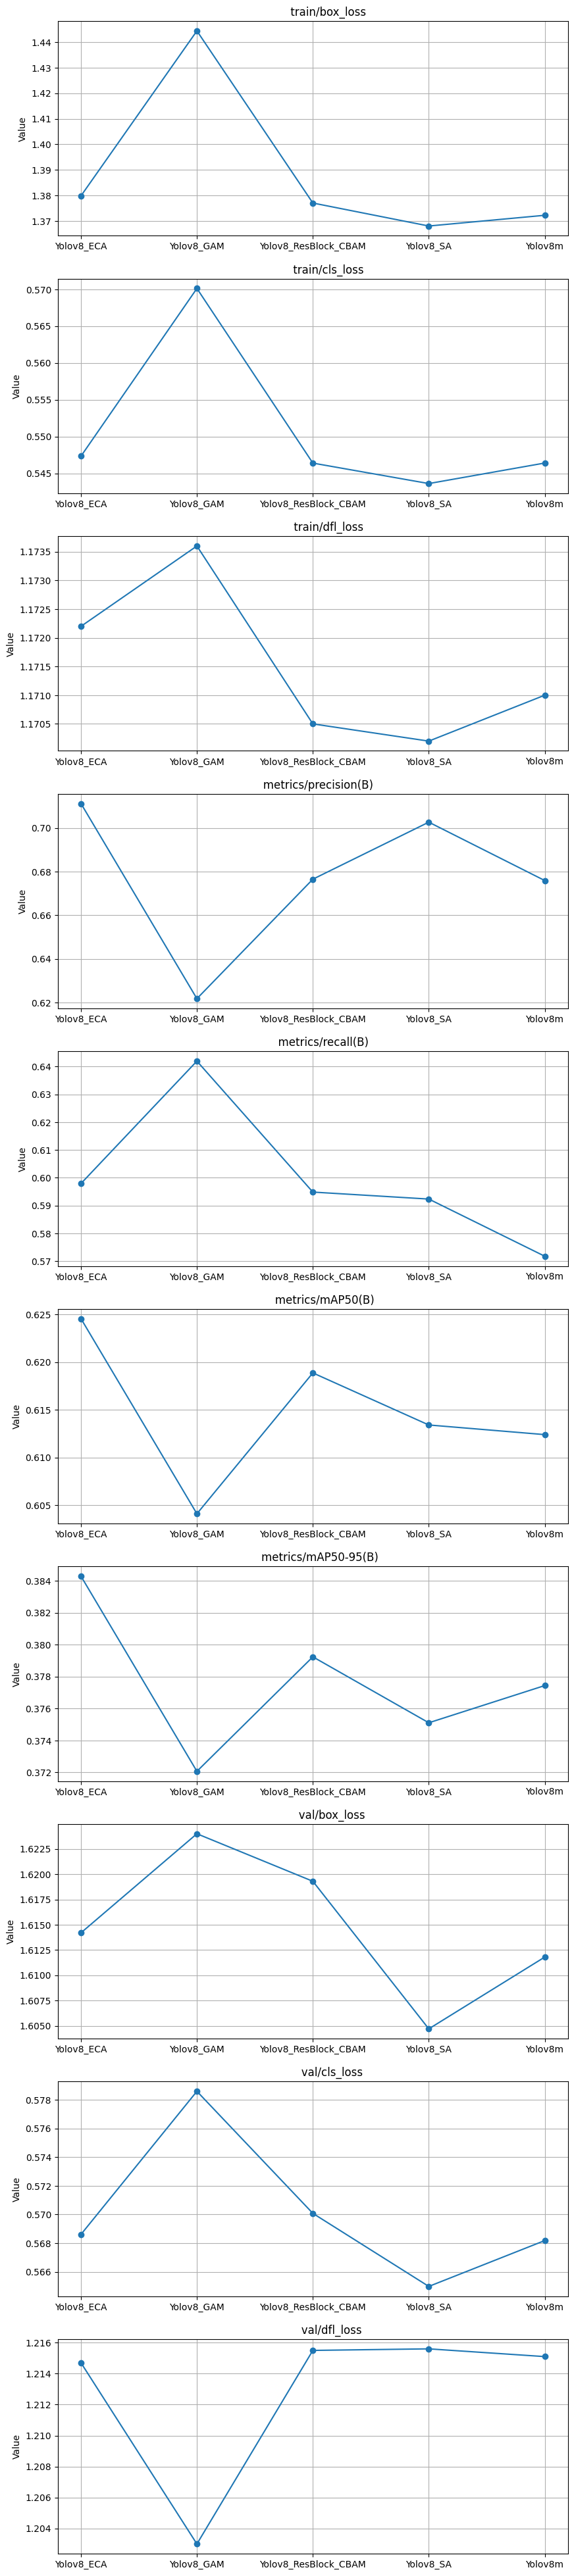

<Figure size 1000x600 with 0 Axes>

In [22]:
# Creating individual line plots for each metric for clearer comparison
num_metrics = len(last_epoch_data.columns)
fig, axes = plt.subplots(num_metrics, 1, figsize=(10, 5*num_metrics))

for i, metric in enumerate(last_epoch_data.columns):
    axes[i].plot(last_epoch_data.index, last_epoch_data[metric], marker='o', linestyle='-')
    axes[i].set_title(metric)
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()
